In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import joblib
import os

In [9]:
with open('../data/k2panda_fin.csv') as file:
    k2 = pd.read_csv(file)
k2.drop(k2.columns[0], axis=1, inplace=True)
k2.head()

,disposition_CONFIRMED,disposition_CANDIDATE,disposition_FALSE POSITIVE,disposition_REFUTED,sy_snum,sy_pnum,pl_controv_flag,pl_orbper,st_rad,st_raderr1,st_radlim,ra,sy_dist,sy_vmag,sy_vmagerr1,sy_kmagerr1,sy_gaiamagerr1
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,41.688644,0.956122,0.098585,0.0,53.651123,179.4610,10.849,0.012,0.018,0.000249
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,41.685500,0.928000,0.055000,0.0,53.651123,179.4610,10.849,0.012,0.018,0.000249
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,41.685500,1.080000,0.060000,0.0,53.651123,179.4610,10.849,0.012,0.018,0.000249
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.301830,0.762602,0.053651,0.0,183.846245,97.1795,11.727,0.046,0.019,0.001307
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.302368,0.710995,0.018609,0.0,183.846245,97.1795,11.727,0.046,0.019,0.001307


In [10]:
y, X = k2[[
    'disposition_CONFIRMED',
    'disposition_CANDIDATE',
    'disposition_FALSE POSITIVE',
    'disposition_REFUTED'
]], k2.drop([
    'disposition_CONFIRMED',
    'disposition_CANDIDATE',
    'disposition_FALSE POSITIVE',
    'disposition_REFUTED'
], axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
def give_values(column):
    if column == 'disposition_CONFIRMED':
        return 0
    elif column == 'disposition_CANDIDATE':
        return 1
    else:
        return 2

y_df = pd.DataFrame(y[['disposition_CONFIRMED', 
           'disposition_CANDIDATE', 
           'disposition_FALSE POSITIVE',
           'disposition_REFUTED'
          ]].idxmax(axis=1).apply(lambda x: give_values(x)))[0].to_numpy()
y_df

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_df, 
                                                    test_size=0.2, 
                                                    random_state=0,
                                                    stratify=y
                                                   )

In [13]:
model = SVC(kernel='rbf', probability=True, random_state=42)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
probs = model.predict_proba(X_test)
accuracy = accuracy_score(y_test, prediction)
print(f'Prediction Accuracy: {accuracy * 100:.2f}%')
print(f'{probs * 100}')

Prediction Accuracy: 92.88%
[[9.99919949e+01 7.62973907e-03 3.75349969e-04]
 [9.99960456e+01 3.78904518e-03 1.65384996e-04]
 [9.99954600e+01 4.34426073e-03 1.95714580e-04]
 ...
 [9.99998439e+01 1.43046492e-04 1.30517758e-05]
 [9.59463972e+01 3.81512695e+00 2.38475796e-01]
 [9.53680975e+01 4.24008069e+00 3.91821768e-01]]


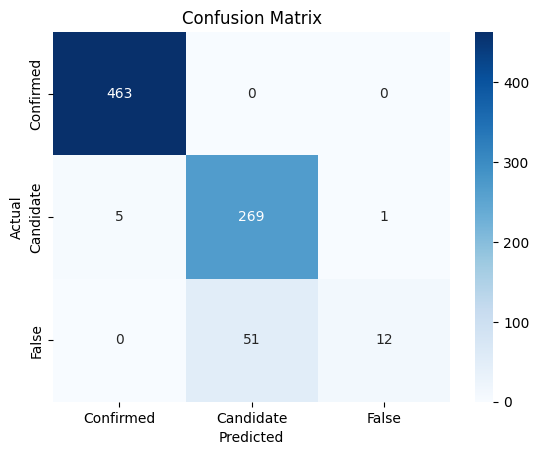

In [14]:
cm = confusion_matrix(y_test, prediction)

sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=['Confirmed', 'Candidate', 'False'],
            yticklabels=['Confirmed', 'Candidate', 'False'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('k2_confusion.png')
plt.show()

In [15]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       463
           1       0.84      0.98      0.90       275
           2       0.92      0.19      0.32        63

    accuracy                           0.93       801
   macro avg       0.92      0.72      0.74       801
weighted avg       0.93      0.93      0.91       801



In [16]:
joblib.dump(model, '../models/k2panda_model.pkl')
os.path.getsize('../models/k2panda_model.pkl')

110147

KeyboardInterrupt: 

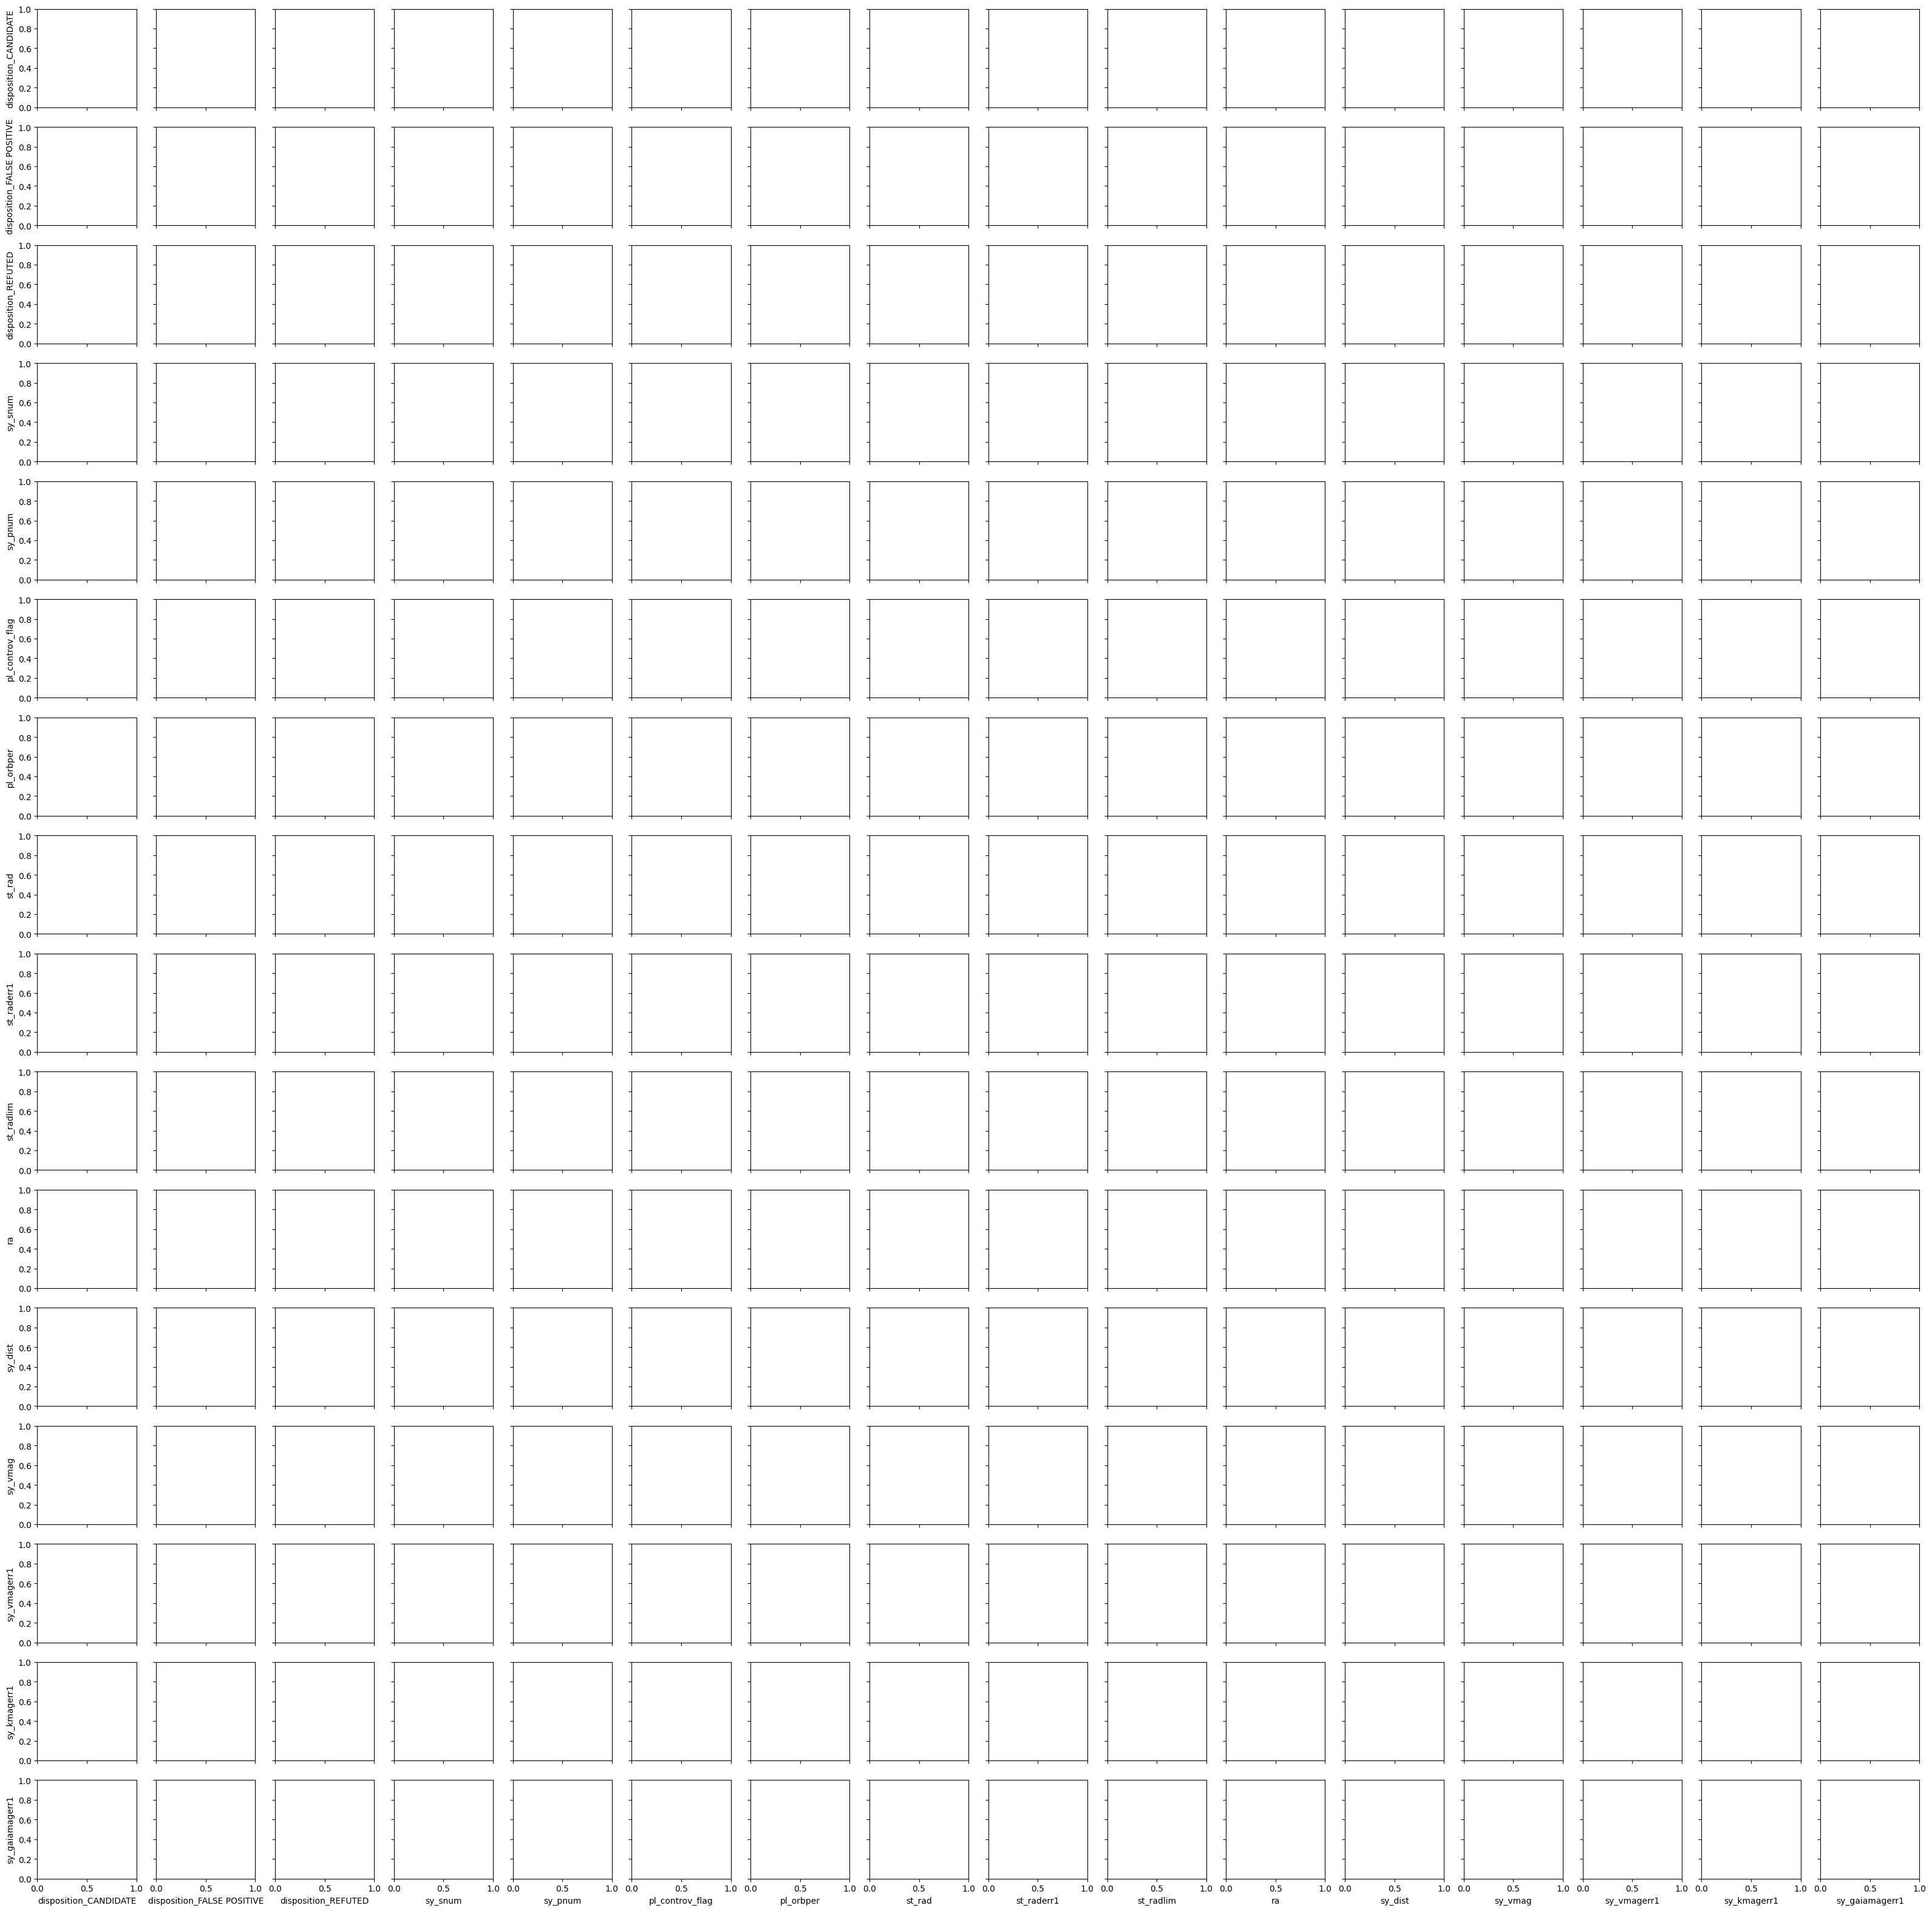

In [17]:
sns.pairplot(k2, hue='disposition_CONFIRMED', palette='Set1', diag_kind='kde')
plt.savefig('k2_pairs.png')
plt.show()